In [68]:
from PIL import Image, ImageEnhance, ImageFilter, ImageDraw, ImageOps
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

In [69]:
path = "Raw dataset\MicrobIA_Dataset_only_counted_processed_anonimyzer_sample\S\T0h_4h\IMG_Niguarda1_936_129_F6_T975.png"
img = Image.open(path)
img.show()

In [70]:
img = img.convert("L")
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(1.75)
img = img.filter(ImageFilter.FIND_EDGES)
img.show()

In [71]:
cx, cy = ndi.center_of_mass(np.array(img))
print(cx, cy)

2008.9399292329572 1930.9903315001816


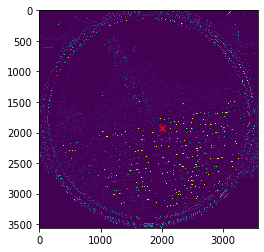

In [72]:
plt.imshow(np.array(img))
plt.scatter(cx, cy, c="red", marker="x")

1562.0600707670428
[447, 369, 3571, 3493]


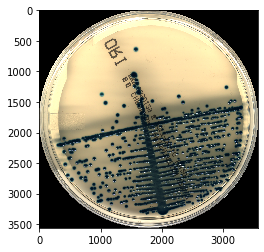

In [73]:
dist_to_side = min(cx, cy, img.size[0]-cx, img.size[1]-cy)
boundingBox = [0, 0, 0, 0]
print(dist_to_side)
boundingBox[0] = round(cx-dist_to_side)
boundingBox[1] = round(cy-dist_to_side)
boundingBox[2] = round(cx+dist_to_side)
boundingBox[3] = round(cy+dist_to_side)
print(boundingBox)

mask = Image.new('L', img.size, 0)
draw = ImageDraw.Draw(mask) 
draw.ellipse((0, 0) + img.size, fill=255)

im2 = Image.new('RGB', img.size)

output = Image.composite(Image.open(path), im2, mask)
output.show()
plt.imshow(output)